In [6]:
import os
import pandas as pd
from wordcloud import WordCloud
import pandas as pd
from nltk.tokenize import RegexpTokenizer
from nltk import Text
from matplotlib import font_manager, rc
from konlpy.tag import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
okt = Okt()

In [25]:
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [7]:
df = pd.read_csv('filename.csv')

In [15]:
df1 = df.to_string()

In [19]:
h = Hannanum()
nouns = h.nouns(df1)

In [54]:
nouns = pd.DataFrame(nouns).to_string()

In [55]:
import re

hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')
result = hangul.sub('', nouns)

In [81]:
sub_list = ['안녕하세요','대통령님','국민','저희','안녕하십니까','정부','현재','청원','최근','존경하','문재','지금','이번','아이','우리나라','대한민국']

In [82]:
for i in sub_list:
    result = re.sub(i, '', result)

In [83]:
retokenize = RegexpTokenizer('[\w]+')
txt = retokenize.tokenize(result)
new_f = [i for i in txt if len(i)>1]

words = Text(new_f, name='issue')

In [85]:
words.vocab()

FreqDist({'사건': 9, '초등학교': 8, '인천': 8, '인터넷': 7, '경찰': 6, '사람': 6, '서울': 6, '아파트': 6, '여러분': 5, '수사': 5, ...})

(0.0, 1.0, 0.0, 1.0)

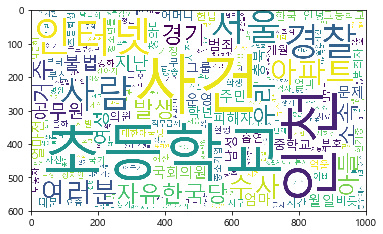

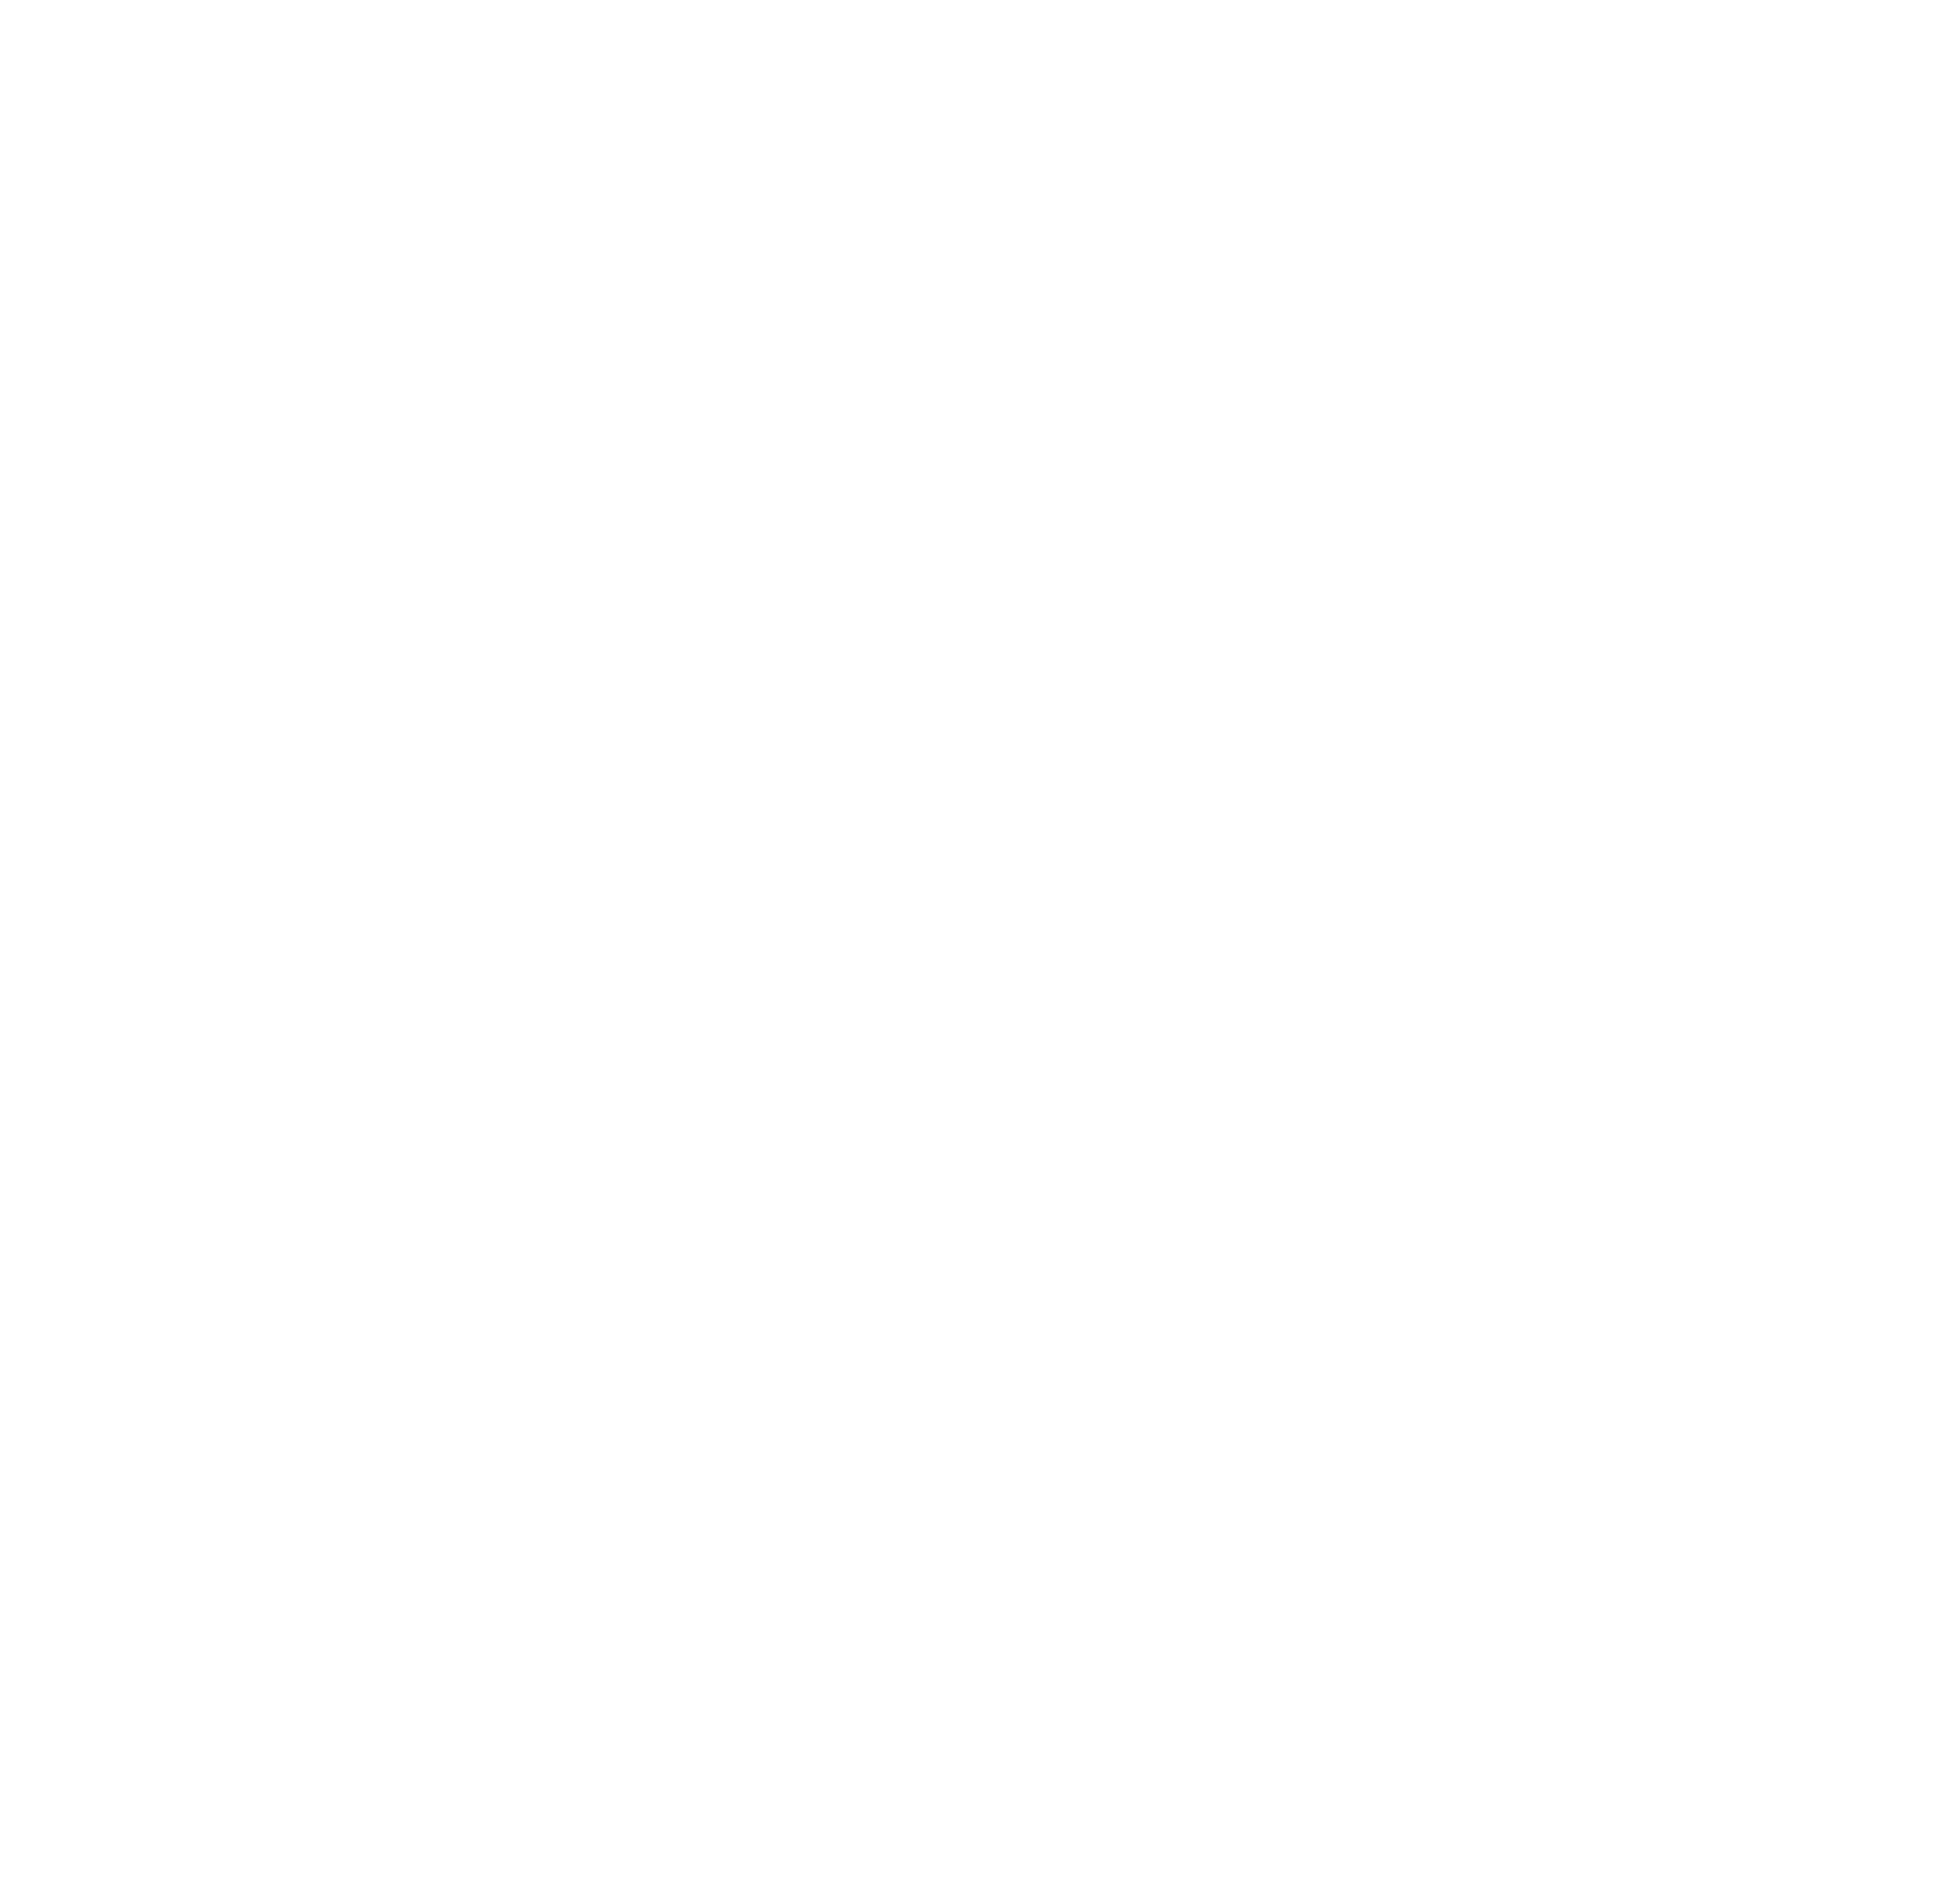

In [86]:
wc = WordCloud(width=1000, height=600, background_color="white", font_path="c:/Windows/Fonts/malgun.ttf",random_state=0)
plt.imshow(wc.generate_from_frequencies(words.vocab()))
plt.figure(figsize=(100,100))
plt.tight_layout(pad=0)
plt.axis("off")